In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [8]:
input_mat = io.loadmat('/content/SonarAl.mat')

In [9]:
def get_sonar(i):
  z=input_mat['sonarAlt'][0][i]
  return z

In [12]:
def low_pass_filter(x_meas, x_esti):
  x_esti = alpha * x_esti + (1 - alpha) * x_meas
  return x_esti

In [13]:
#input parameters
alpha =0.7
n_samples = 800
time_end = 10

In [14]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_esti_save = np.zeros(n_samples)

In [15]:
x_esti = None
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
      x_esti = x_meas
    else:
      x_esti = low_pass_filter(x_meas, x_esti)

    x_meas_save[i] = x_meas
    x_esti_save[i] = x_esti

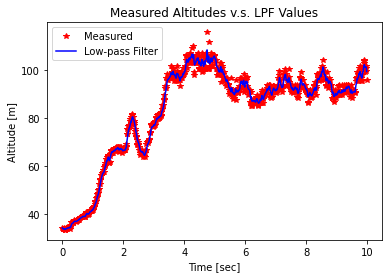

In [17]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_esti_save, 'b-', label='Low-pass Filter')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.savefig('/content/png')